# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that was colleted from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://live.staticflickr.com/65535/52257468909_05bb576509_h.jpg>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

With any new dataset, it's a good idea to do some standard checks and conversions. We typically always first look at `.shape`, `.head()`, `.tail()`, `.info()` and `.sample()`. 

In [4]:
data.shape

(5391, 6)

In [5]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2191,2423,3/9/2004,Paparazzi,"$20,000,000","$16,612,072","$15,712,072"
4231,738,9/14/2012,Resident Evil: Retribution,"$65,000,000","$238,940,997","$42,345,531"
1850,2419,7/26/2002,The Country Bears,"$20,000,000","$16,988,996","$16,988,996"
4414,5084,6/28/2013,Detention of the Dead,"$500,000","$1,778","$1,778"
4863,5311,3/25/2015,Open Secret,"$100,000",$0,$0


In [6]:
data.tail()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0
5390,2517,12/31/2020,"Story of Bonnie and Clyde, The","$20,000,000",$0,$0


There are thousands of entries in the DataFrame - one entry for each movie. We'll have some challenges formatting the data before we can do more analysis because we have non-numeric characters in our budget and revenue columns.

In [7]:
data.isna().values.any()

False

In [8]:
print(f'Any duplicates? {data.duplicated().values.any()}')

duplicated_rows = data[data.duplicated()]
print(f'Number of duplicates: {len(duplicated_rows)}')

Any duplicates? False
Number of duplicates: 0


The fact that there are no duplicates or NaN (not-a-number) values in the dataset will make our job easier. We can also see if there are null values in `.info()`, which also shows us that we need to do some type conversion.

In [9]:
# Show NaN values and data types per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In order to convert the data in the budget and revenue columns and remove all the non-numeric characters, we can use a nested for loop. We create two Python lists: the characters to remove and the column names. Inside the nested loop we can combine `.replace()` and `.to_numeric()` to achieve our goal.

In [10]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # Replace each character with an empty string
        data[col] = data[col].str.replace(char, "", regex=False)
    # Convert column to a numeric data type
    data[col] = pd.to_numeric(data[col])

In [11]:
data.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

To convert the Release_Date column to a DateTime object, all we need to do is call the to_datetime() function.

`data['Release_Date'] = pd.to_datetime(data['Release_Date'])`

When we check `.info()` again we see that the columns now have the desired data type. This allows us to proceed with the next parts of our analysis.

In [12]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

We can answer many of the questions with a single command: `.describe()`.

In [14]:
data.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00","5,391.00","5,391.00","5,391.00"
mean,"2,696.00","31,113,737.58","88,855,421.96","41,235,519.44"
std,"1,556.39","40,523,796.88","168,457,757.00","66,029,346.27"
min,1.00,"1,100.00",0.00,0.00
25%,"1,348.50","5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00","17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50","40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00","425,000,000.00","2,783,918,982.00","936,662,225.00"


The average film costs about \\$31m to make and makes around 3x that (or ~\\$89m) in worldwide revenue. So that's encouraging.

But quite a lot of films lose money too. In fact, all the films in the bottom quartile lose money, since the average cost is \\$5 million and they only bring in \\$3.8m in worldwide revenue!

The minimum domestic and worldwide revenue is \\$0. That makes sense. If a film never gets screened or is cancelled, then this is the number we would expect to see here.

On the other hand, the highest production budget was \\$425,000,000 and the highest worldwide revenue was \\$2,783,918,982. \\$2.7 Billion revenue! 



In [15]:
data[data['USD_Production_Budget'] == 1100.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
2427,5391,2005-05-08,My Date With Drew,1100,181041,181041


In [16]:
data[data['USD_Production_Budget'] == 425000000.00]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625


In [17]:
data.sort_values('USD_Production_Budget', ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
3529,1,2009-12-18,Avatar,425000000,2783918982,760507625
5079,2,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,2058662225,936662225
2911,3,2007-05-24,Pirates of the Caribbean: At World’s End,300000000,963420425,309420425
4925,4,2015-06-11,Spectre,300000000,879620923,200074175
4333,6,2013-02-07,The Lone Ranger,275000000,260002115,89302115
4223,7,2012-09-03,John Carter,275000000,282778100,73058679
4196,5,2012-07-20,The Dark Knight Rises,275000000,1084439099,448139099
3777,8,2010-11-24,Tangled,260000000,586581936,200821936
2885,9,2007-04-05,Spider-Man 3,258000000,890875303,336530303
4511,15,2013-12-13,The Hobbit: The Desolation of Smaug,250000000,960366855,258366855


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [18]:
zero_domestic = data[data['USD_Domestic_Gross'] == 0]
print(f'Number of films that grossed $0 domestically {len(zero_domestic)}')

Number of films that grossed $0 domestically 512


In [19]:
zero_domestic.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


We see that there are 512 films in the dataset that had no revenue in the United States. However, the highest budget films with no revenue have a release date AFTER the date on which the dataset was compiled (May 1st, 2018).

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [20]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f'Number of films that grossed $0 worldwide {len(zero_worldwide)}')


Number of films that grossed $0 worldwide 357


In [21]:
zero_worldwide.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


When we check worldwide revenue instead, we see that there are 357 films that made no money internationally. Once again, some of the films have not been released yet at the time the data was compiled. However, 512 versus 357. Why is there a difference? 

The reason some international films were never screened in the United States.  In fact, we can see an example of this in our previous analysis. "Don Gato, el inicio de la pandilla" made about \\$4.5 million dollars in the box office, but nothing in the United States. Perhaps they should have screened it there too, considering it cost \\$80 million to make!



### Filtering on Multiple Conditions

So far, we've created subsets for our DataFrames based on a single condition. But what if we want to select our data based on more than one condition? For example, which films made money internationally (i.e., `data['USD_Worldwide_Gross'] != 0`), but had zero box office revenue in the United States (i.e., `data['USD_Domestic_Gross'] == 0`)? 

How would we create a filter for these two conditions? One approach is to use conditional filtering with the bitwise and & operator.

```
international_releases = data[(data['USD_Domestic_Gross'] == 0) & 
                              (data['USD_Worldwide_Gross'] != 0)]
```

Why does this work? Pandas is built on top of NumPy, which uses Python's bitwise operators. And these bitwise operators allow us to do comparisons on an element by element basis in both NumPy and Pandas! Here's an example:

<img src='https://live.staticflickr.com/65535/52257528418_020abf0ccb_z.jpg'>

However, we're also checking if the domestic revenue was zero and the worldwide revenue was not zero. Because the bitwise operator takes precedence, we need to include parentheses ( ) around the comparisons we'd like to prioritize.

Note: this is not the only technique we can use to make multiple comparisons.

In [22]:
data[(data['USD_Domestic_Gross'] == 0) & (data['USD_Worldwide_Gross'] != 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [23]:
international_releases = data[(data['USD_Domestic_Gross'] == 0) & 
                              (data['USD_Worldwide_Gross'] != 0)]
print(f'Number of international releases: {len(international_releases)}')
international_releases.head()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [24]:
international_releases = data.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
print(f'Number of international releases: {len(international_releases)}')
international_releases.tail()

Number of international releases: 155


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0
5374,4237,2017-08-25,Polina danser sa vie,4000000,36630,0


### Unreleased Films

Now we can turn our attention to films in the dataset that were not released at the time the data was collected. This is why films like Singularity and Aquaman had zero revenue.

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [25]:
# Date of Data Collection
collect_date = pd.Timestamp('2018-5-1')

In [26]:
future_releases = data[data['Release_Date'] >= collect_date]
print(f'Number of unreleased movies: {len(future_releases)}')
future_releases

Number of unreleased movies: 7


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5386,2950,2018-10-08,Meg,15000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5388,96,2020-12-31,Singularity,175000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
5390,2517,2020-12-31,"Story of Bonnie and Clyde, The",20000000,0,0


In [27]:
# exclude future releases
data_clean = data.drop(future_releases.index)

In [28]:
# difference is 7 rows
data.shape[0] - data_clean.shape[0]

7

### Films that Lost Money

Having removed the unreleased films entirely can you calculate the percentage of films that did not break even at the box office? We already saw that more than the bottom quartile of movies appears to lose money when we ran `.describe()`. However, what is the true percentage of films where the costs exceed the worldwide gross revenue? 

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [29]:
money_losing = data_clean[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']]
len(money_losing)/len(data_clean)

0.37277117384843983

In [30]:
money_losing = data_clean.query('USD_Production_Budget > USD_Worldwide_Gross')
money_losing.shape[0]/data_clean.shape[0]

0.37277117384843983

In both cases, we see that 37.2% of films do not cover their production budget at the box office. Who knew that film finance could be so risky! 

# Seaborn for Data Viz: Bubble Charts

We're now ready to visualize our data. Today we will try another popular data visualization tool that you can use alongside plotly and Matplotlib: Seaborn. Seaborn is built on top of Matplotlib and it makes creating certain visualizations very convenient.

**Import Seaborn**

The first step is adding Seaborn to our notebook. By convention we'll use the name sns. 

`import seaborn as sns`

To create a `.scatterplot()`, all we need to do is supply our DataFrame and the column names that we'd like to see on our axes.

<AxesSubplot:xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

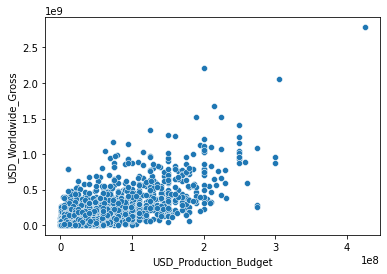

In [31]:
sns.scatterplot(data=data_clean,
                x='USD_Production_Budget', 
                y='USD_Worldwide_Gross')

That should look familiar. Because Seaborn is built on top of Matplotlib, we can dive into the Matplotlib layer anytime to configure our chart. For example, we can increase the size of our figure:

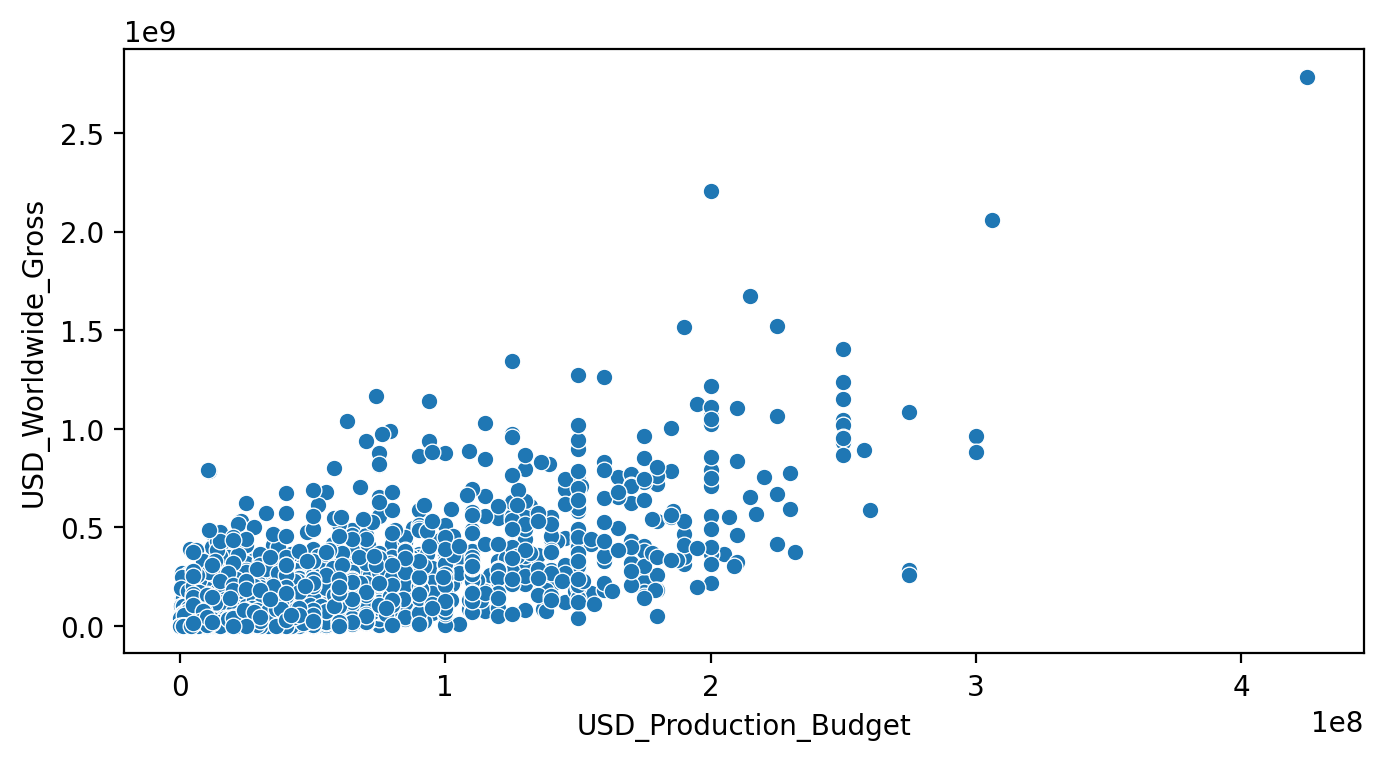

In [32]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')

plt.show()

And to style our chart we can simply configure the Axes object that is returned from `sns.scatterplot()`.

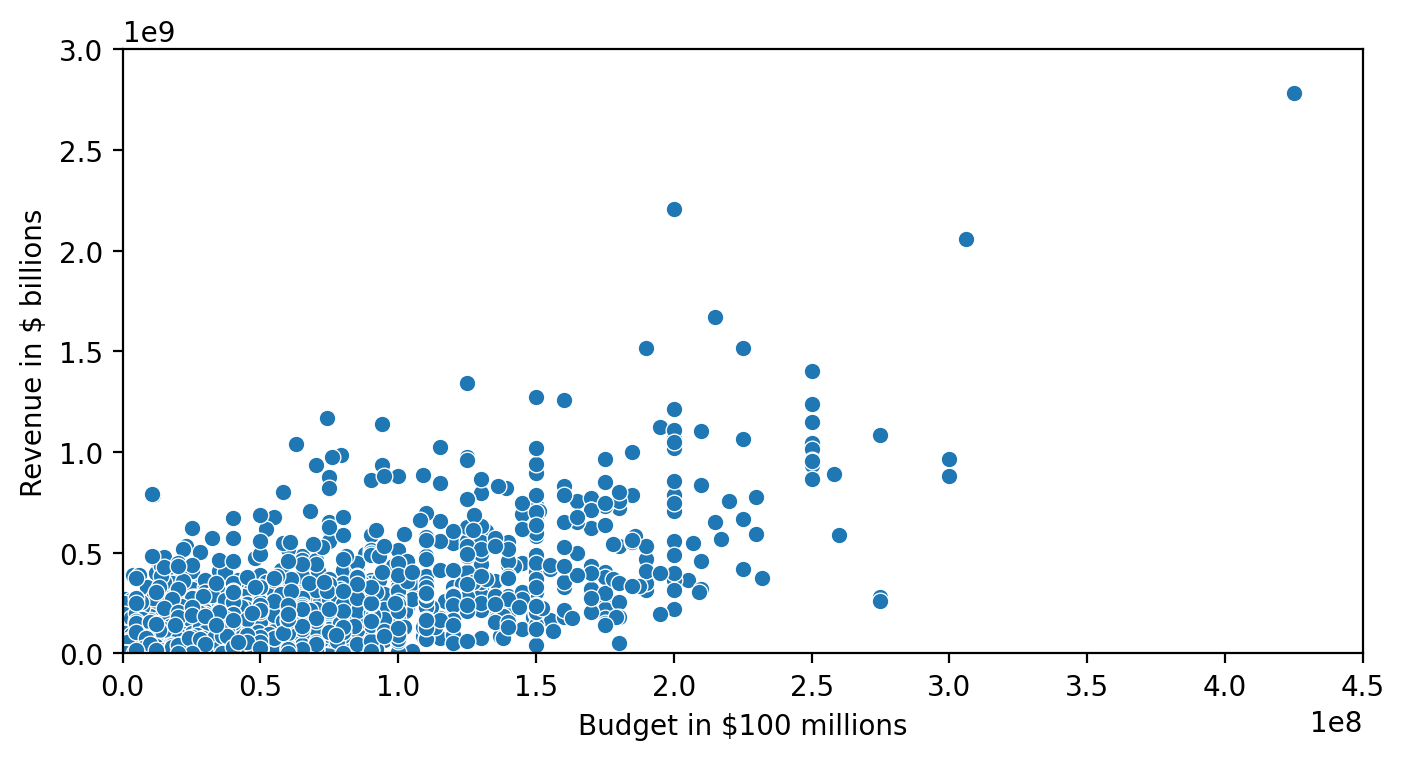

In [33]:
plt.figure(figsize=(8,4), dpi=200)

ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross')

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions')

plt.show()

But the reason we're using Seaborn is because of the hue and size parameters that make it very easy to create a bubble chart. These parameters allow us to colour the data and change their size according to one of the columns in our DataFrame.

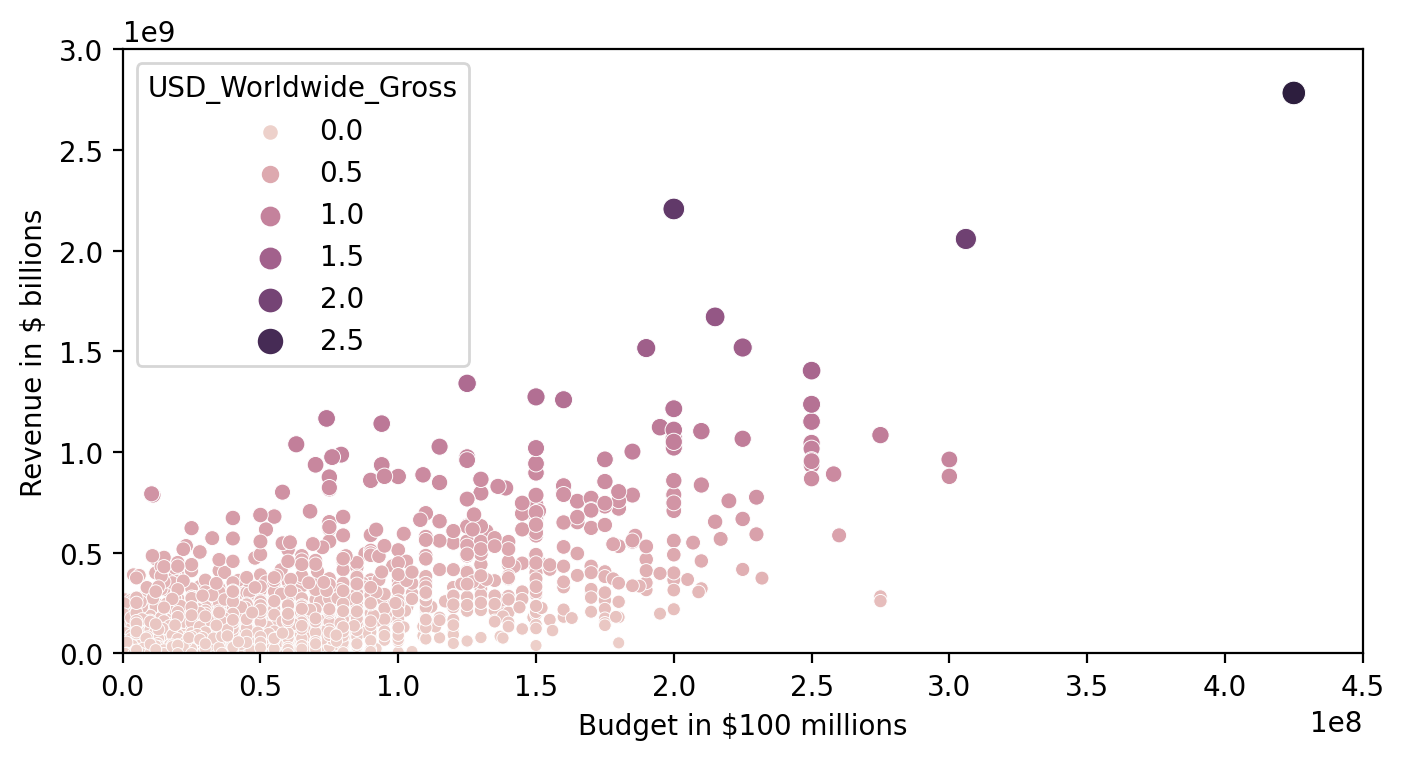

In [34]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # change color
                     size='USD_Worldwide_Gross',) # change size of dot

ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)

plt.show()

Now our higher grossing movies are bigger and darker on our chart. That's super handy. But Seaborn offers a number of convenient styling options as well.

To set the styling on a single chart (as opposed to all the charts in the entire notebook) we can use Python's `with` keyword. 

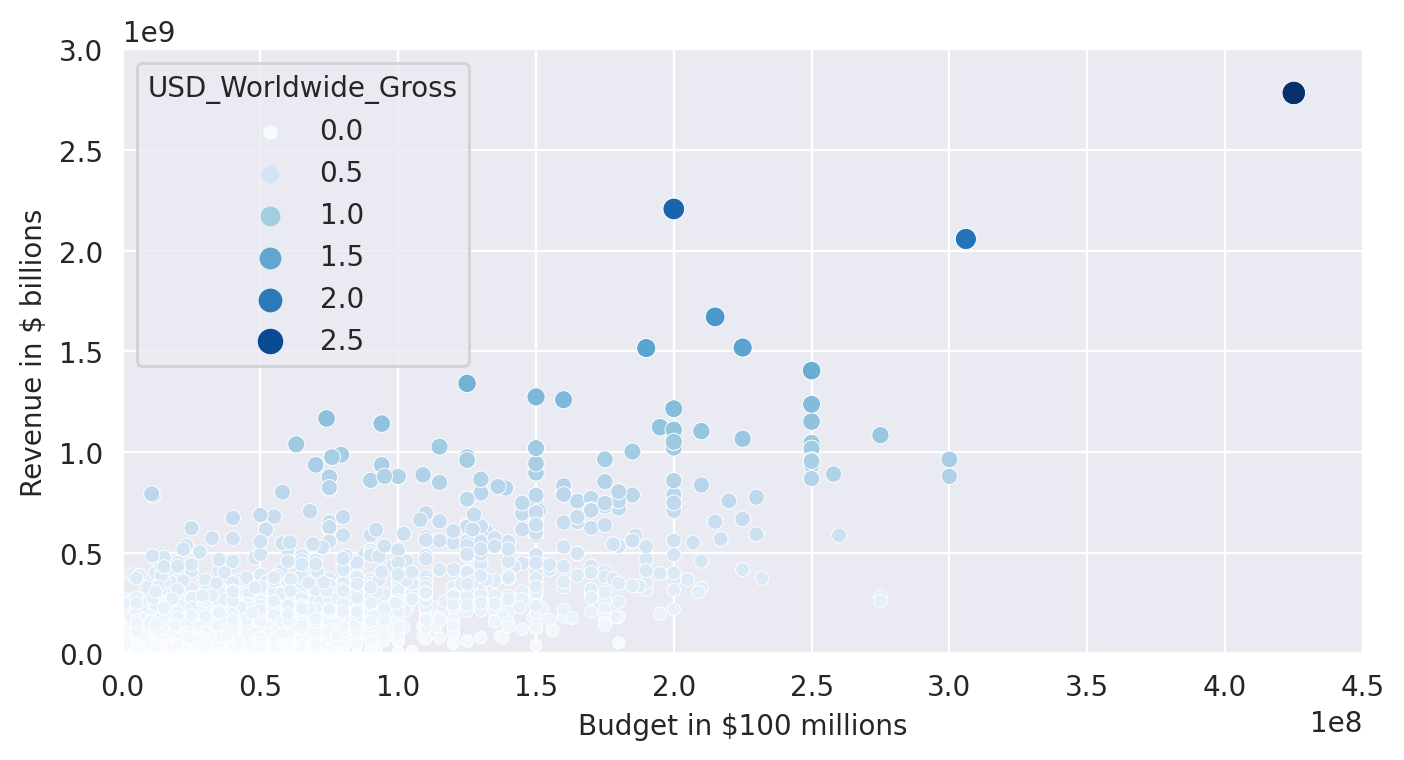

In [35]:
plt.figure(figsize=(8,4), dpi=200)

# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget', 
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       palette='Blues',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
        xlim=(0, 450000000),
        ylabel='Revenue in $ billions',
        xlabel='Budget in $100 millions')

plt.show()

In addition to `'darkgrid'`, Seaborn has a number of built-in themes. so you can style your chart very quickly. Try out `'whitegrid'`, `'dark'`,  or `'ticks'` for example.

### Plotting Movie Releases over Time


**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png width=800>

Notice how we are actually representing THREE dimensions in this chart: the budget, the release date, and the worldwide revenue. This is what makes bubble charts so awesomely informative.

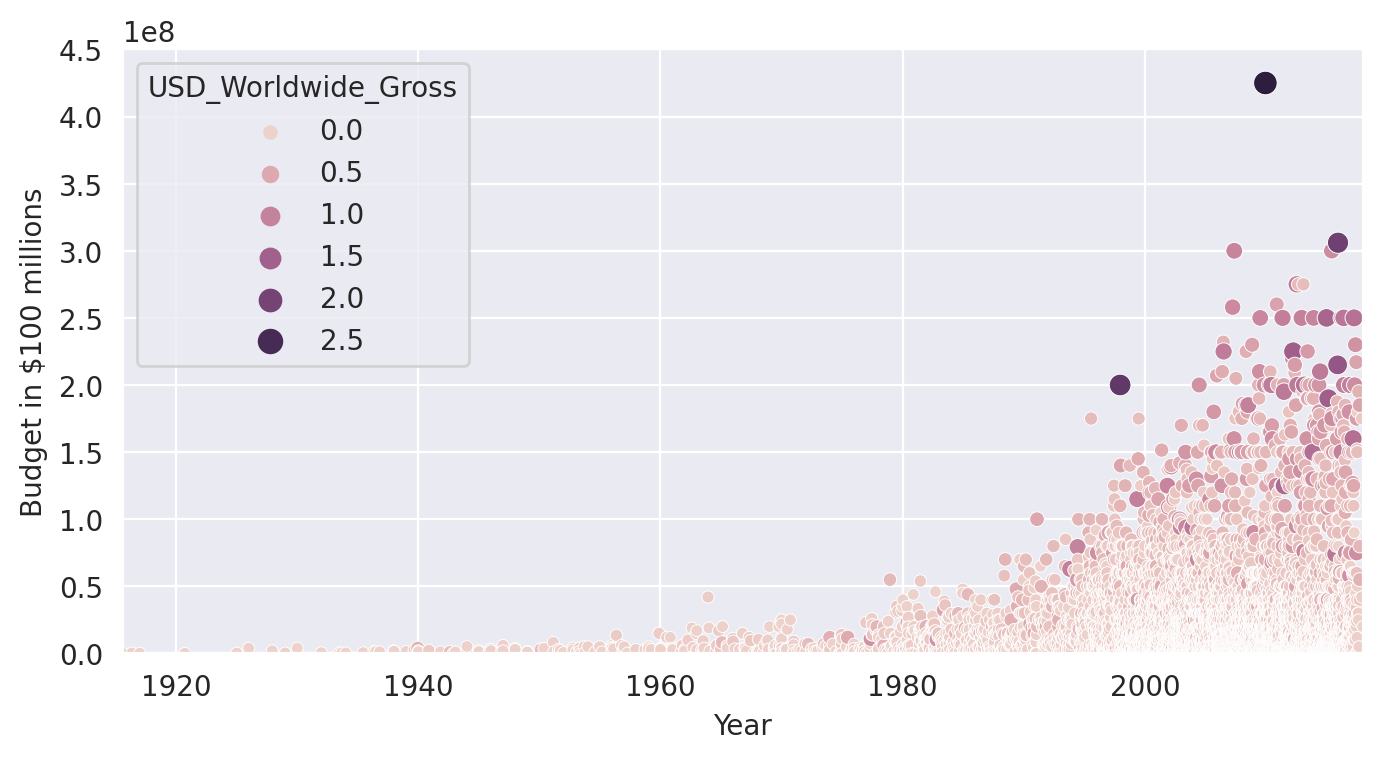

In [36]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style("darkgrid"):
    ax = sns.scatterplot(data=data_clean, 
                    x='Release_Date', 
                    y='USD_Production_Budget',
                    hue='USD_Worldwide_Gross',
                    size='USD_Worldwide_Gross',)

    ax.set(ylim=(0, 450000000),
           xlim=(data_clean.Release_Date.min(), data_clean.Release_Date.max()),
           xlabel='Year',
           ylabel='Budget in $100 millions')


What do we see here? First, movie budgets have just exploded in the last 40 years or so. Up until the 1970s, the film industry appears to have been in an entirely different era. Budgets started growing fast from the 1980s onwards and continued to grow through the 2000s. Also, the industry has grown massively, producing many more films than before. The number of data points is so dense from 2000 onwards that they are overlapping.

# Converting Years to Decades Trick


In our bubble charts, we've seen how massively the industry has changed over time, especially from the 1970s onwards. This makes us think it makes sense to separate our films out by decade. 

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

To create a DatetimeIndex, we just call the constructor and provide our release date column as an argument to initialise the DatetimeIndex object. Then we can extract all the years from the DatetimeIndex.

In [37]:
dt_index = pd.DatetimeIndex(data_clean['Release_Date'])
years = dt_index.year
years

Int64Index([1915, 1916, 1916, 1920, 1925, 1925, 1927, 1929, 1930, 1931,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Release_Date', length=5384)

Now, all we need to do is convert the years to decades. For that, we will use floor division (aka integer division). The difference to regular division is that the result is effectively rounded down.
```
5.0 / 2
# output: 2.5
5.0 // 2
# output: 2.0

```
In our case, we will use the floor division by 10 and then multiplication by 10 to convert the release year to the release decade:

In [38]:
# How to convert the year 1999 to the 90s decade
1999//10

199

In [39]:
199*10

1990

We can do this for all the years and then add the decades back as a column.

In [40]:
decades = years//10*10
data_clean['Decade'] = decades

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [41]:
old_films = data_clean[data_clean['Decade'] <= 1960]
new_films = data_clean[data_clean['Decade'] > 1960]

In [42]:
old_films.describe()

,Rank,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
count,153.00,153.00,153.00,153.00,153.00
mean,"4,274.77","4,611,297.65","30,419,634.38","22,389,473.87","1,949.15"
std,742.14,"5,713,648.85","54,931,828.93","32,641,752.41",12.72
min,"1,253.00","100,000.00",0.00,0.00,"1,910.00"
25%,"3,973.00","1,250,000.00","5,273,000.00","5,000,000.00","1,940.00"
50%,"4,434.00","2,900,000.00","10,000,000.00","10,000,000.00","1,950.00"
75%,"4,785.00","5,000,000.00","33,208,099.00","28,350,000.00","1,960.00"
max,"5,299.00","42,000,000.00","390,525,192.00","198,680,470.00","1,960.00"


In [43]:
old_films.sort_values('USD_Production_Budget', ascending=False).head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960


The most expensive film prior to 1970 was Cleopatra, with a production budget of $42 million. That's some serious 1960s money, and judging by the trailer, a lot of it went into extravagant costumes, set design, and plenty of extras. 

# Seaborn Regression Plots

Let's visualize the relationship between the movie budget and the worldwide revenue using linear regression. Seaborn makes this incredibly easy with the `.regplot()` function.



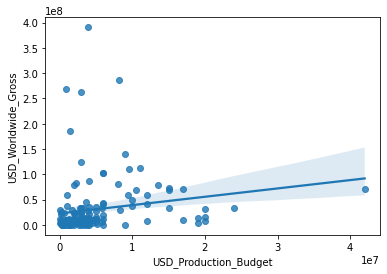

In [44]:
sns.regplot(data=old_films, 
            x='USD_Production_Budget',
            y='USD_Worldwide_Gross')
plt.show()

This creates a scatter plot and draws a linear regression line together with the confidence interval at the same time.

To style the chart further, we can once again, drop into the Matplotlib layer and supply keyword arguments as dictionaries. We can customize the scatter plot (e.g., by changing the transparency of the dots) and the regression line itself (e.g., by changing the colour).

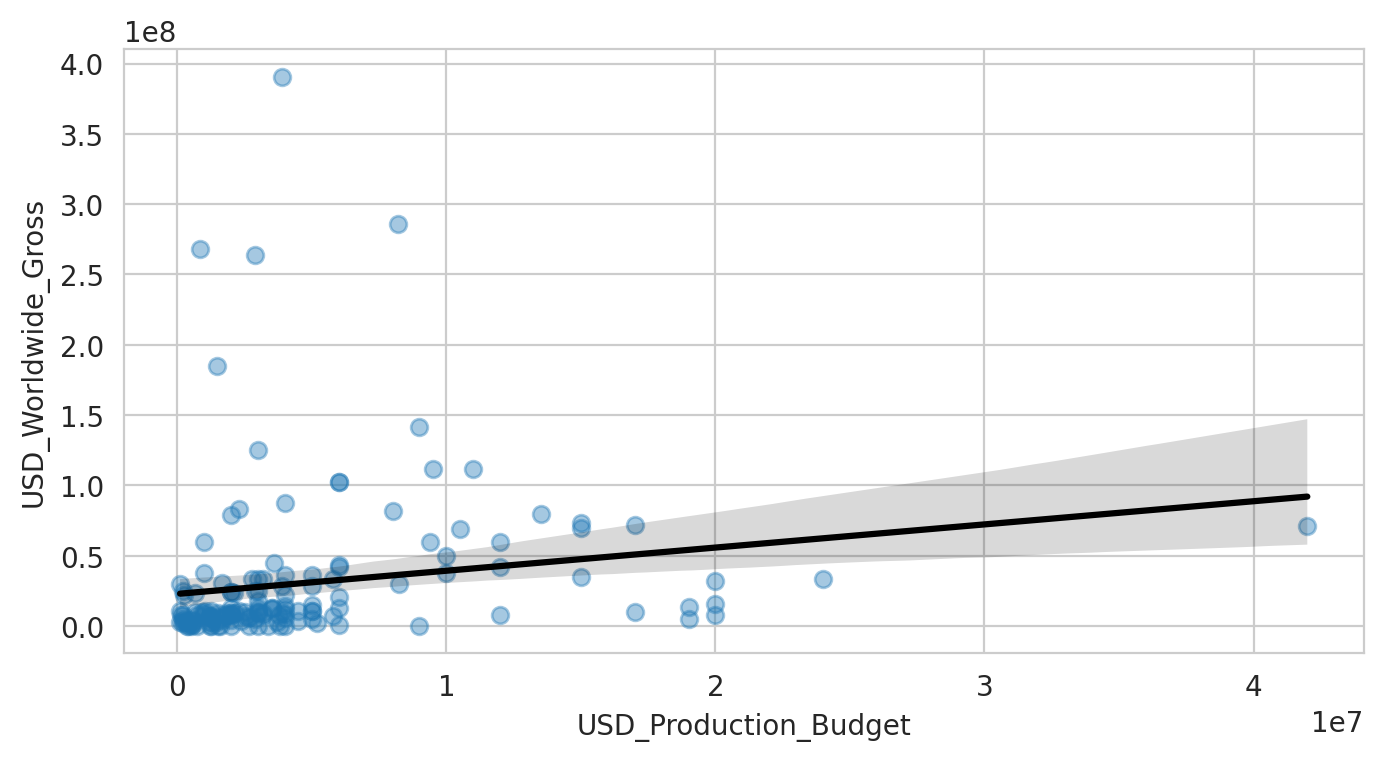

In [45]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films, 
            x='USD_Production_Budget', 
            y='USD_Worldwide_Gross',
            scatter_kws = {'alpha': 0.4},
            line_kws = {'color': 'black'})
plt.show()

What do we see here? Well, first off we can spot Cleopatra on the far right. But also, we see that many lower budget films made much more money! The relationship between the production budget and movie revenue is not very strong. Many points on the left are very far away for the line, so the line appears not to capture the relationship between budget and revenue very well at all!

But does the same hold true for the newer films?

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \\$ billions" and "Budget in \\$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of \\$150 million make according to the regression line?

To style the chart we can use the same techniques as before: providing values for the `.regplot()` function, as well as making use of the Matplotlib Axes object to fine-tune the limits, labels, and general style.

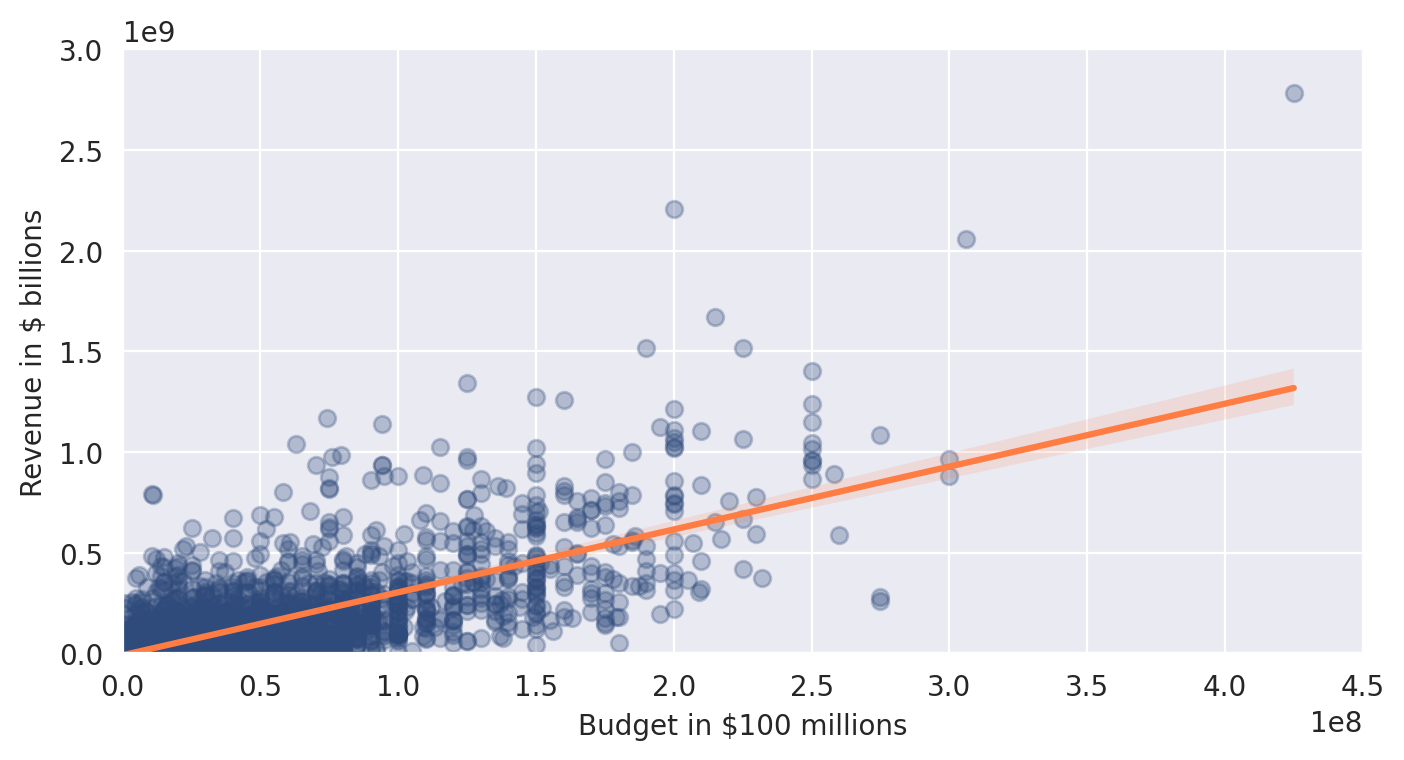

In [46]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws = {'alpha': 0.3},
                   line_kws = {'color': '#ff7c43'})
  
  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

How do we interpret our chart? This time we are getting a much better fit, compared to the old films. We can see this visually from the fact that our data points line up much better with our regression line (pun intended). Also, the confidence interval is much narrower. We also see that a film with a \\$150 million budget is predicted to make slightly under \\$500 million by our regression line. 

All in all, we can be pretty confident that there does indeed seem to be a relationship between a film's budget and that film's worldwide revenue.

But how much of the variation in revenue does the budget actually explain? And how much extra revenue can we expect for an additional $1 increase in the budget? To find out, we need to dive into the numbers underlying our regression model.

# Run Your Own Regression with scikit-learn

[Simple Linear Regression](https://en.wikipedia.org/wiki/Simple_linear_regression)

Let's dive into our linear regression model a bit more. We are using a univariate regression. This is a regression with a single explanatory variable (our movie BUDGET). Explanatory variables are also referred to as features in machine learning terminology.

Using our data on budgets, the linear regression estimates the best possible line to fit our movie revenues. The regression line has the following structure:

Our Linear Model:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

<img src='https://live.staticflickr.com/65535/52257583408_487679eeab_m.jpg'>



To find the best possible line, our regression will estimate the y-intercept ("theta zero") and the slope ("theta one"). The line's intercept on the y-axis tells us how much revenue a movie would make if the budget was 0. The slope tells us how much extra revenue we get for a $1 increase in the movie budget.

So how can we find out what our model's estimates are for theta-one and theta-zero? And how can we run our own regression, regardless of whether we want to visualize it on a chart? For that, we can use [scikit-learn](https://scikit-learn.org/stable/).

**Import scikit-learn**

Let's add the LinearRegression from scikit-learn to our notebook.

`from sklearn.linear_model import LinearRegression`

Now we can run a LinearRegression. First, let's create a [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) object that will do the work for us.

In [47]:
# Create regression object
regression = LinearRegression()

Now we should specify our features and our targets (i.e., our response variable). You will often see the features named capital `X` and the target named lower case `y`:

In [48]:
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

Our LinearRegression does not like receiving Pandas Series (e.g., new_films['USD_Production_Budget']), so I've created some new DataFrames here. Now it's time to get to work and run the calculations:

In [49]:
# Find the best-fit line
regression.fit(X, y)

LinearRegression()

That's it. Now we can look at the values of theta-one and theta-zero from the equation above.

In [58]:
# Theta zero
regression.intercept_

array([-8650768.00661027])

In [59]:
# Theta one
regression.coef_

array([[3.12259592]])

Both `intercept_` and `coef_` are simply attributes of the LinearRegression object. Don't worry about the underscores at the end, these are simply part of the attribute names that the scikit-learn developers have chosen.

How do we interpret the y-intercept? Literally, means that if a movie budget is \\$0, the estimated movie revenue is -\\$8.65 million. So this is clearly unrealistic. Why would our model tell us such nonsense? Well, the reason is that we are specifying what the model should be ahead of time - namely a straight line - and then finding the best straight line for our data. Considering that you can't have negative revenue or a negative budget, we have to be careful about interpreting our very simple model too literally. After all, it's just an estimate and this estimate will be the most accurate on the chart where we have the most data points (rather than at the extreme left or right).

What about the slope? The slope tells us that for every extra \\$1 in the budget, movie revenue increases by \\$3.1. So, that's pretty interesting. That means the higher our budget, the higher our estimated revenue. If budgets are all that matter to make lots of money, then studio executives and film financiers should try and produce the biggest films possible, right? Maybe that's exactly why we've seen a massive increase in budgets over the past 30 years.

One measure of figuring out how well our model fits our data is by looking at a metric called r-squared. This is a good number to look at in addition to eyeballing our charts.

R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.

In [52]:
# R-squared
regression.score(X, y)

0.5577032617720403


We see that our r-squared comes in at around 0.558. This means that our model explains about 56% of the variance in movie revenue. That's actually pretty amazing, considering we've got the simplest possible model, with only one explanatory variable. The real world is super complex, so in many academic circles, if a researcher can build a simple model that explains over 50% or so of what is actually happening, then it's a pretty decent model.

Remember how we were quite sceptical about our regression looking at the chart for our old_films? 

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [53]:
regression_old_film = LinearRegression()
X = pd.DataFrame(old_films, columns=['USD_Production_Budget'])
y = pd.DataFrame(old_films, columns=['USD_Worldwide_Gross'])
regression_old_film.fit(X, y)
print(f'The slope coefficient is: {regression_old_film.coef_[0]}')
print(f'The intercept is: {regression_old_film.intercept_[0]}')
print(f'The r-squared is: {regression_old_film.score(X, y)}')

The slope coefficient is: [1.64771314]
The intercept is: 22821538.635080382
The r-squared is: 0.02937258620576877


Running the numbers this time around, we can confirm just how inappropriate the linear model is for the pre-1970 films. We still see a positive relationship between budgets and revenue, since the slope (our theta-one) is 1.6, but the r-squared is very low. This makes sense considering how poorly our data points aligned with our line earlier.

# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

For a \\$350 million budget film, our model predicts a worldwide revenue of around \\$1 billion! You can calculate this as follows:

In [54]:
-8650768 + 3.12259592 * 350000000

1084257804.0

Or, using the regression object, you could also work it out like this:

In [60]:
regression.intercept_[0]

-8650768.006610274

In [61]:
regression.coef_[0, 0]

3.122595917321093

In [57]:
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate, -5) #The number is rounded to ndigits precision before the decimal point.
print(f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.0843e+09.


(The colon : and dot . in a print statement is quite handy for controlling the number of digits you'd like to show up in the output)